<a href="https://colab.research.google.com/github/introspective321/Image_Retrieval_CIFAR-10/blob/main/CIFAR_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading CIFAR-10 Dataset

In [ ]:
#Necessary Libraries
!pip install numpy
import numpy as np
!pip install opencv-python
import cv2
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install -U scikit-learn
from skimage.feature import hog
from skimage import exposure
!pip install pandas
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 20.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz

--2024-03-26 18:49:40--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  79.2MB/s    in 2.1s    

2024-03-26 18:49:43 (79.2 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
data_batch_1 = unpickle(r'cifar-10-batches-py/data_batch_1')
print(type(data_batch_1))
print("--------------------------")
print(data_batch_1.keys())
print("--------------------------")
for item in data_batch_1:
    print(item, type(data_batch_1[item]))
print("--------------------------")
print("Labels:", set(data_batch_1['labels']))

<class 'dict'>
--------------------------
dict_keys(['batch_label', 'labels', 'data', 'filenames'])
--------------------------
batch_label <class 'str'>
labels <class 'list'>
data <class 'numpy.ndarray'>
filenames <class 'list'>
--------------------------
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [ ]:
batch_1 = unpickle('cifar-10-batches-py/data_batch_1')
batch_2 = unpickle('cifar-10-batches-py/data_batch_2')
batch_3 = unpickle('cifar-10-batches-py/data_batch_3')
batch_4 = unpickle('cifar-10-batches-py/data_batch_4')
batch_5 = unpickle('cifar-10-batches-py/data_batch_5')
test_batch =unpickle('cifar-10-batches-py/test_batch')

X_train_pixel = np.concatenate([batch_1['data'], batch_2['data'], batch_3['data'], batch_4['data'], batch_5['data']], axis=0)
y_train_pixel = np.concatenate([batch_1['labels'], batch_2['labels'], batch_3['labels'], batch_4['labels'], batch_5['labels']], axis=0)

X_test_pixel = test_batch['data']
y_test_pixel = test_batch['labels']

# Reshape the image data to its original dimensions
X_train_pixel = X_train_pixel.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
X_test_pixel = X_test_pixel.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

print(f'Training Samples: {len(X_train_pixel)}')
print(f'Testing Samples: {len(X_test_pixel)}')

Training Samples: 50000
Testing Samples: 10000


In [ ]:
print(X_train_pixel[0].shape)

(32, 32, 3)


## Preprocessing

In [ ]:
def rgb2gray(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Converting to grayscale
X_training_gray = [ rgb2gray(np.array(X_train_pixel[i])) for i in range(50000)]
X_testing_gray  = [ rgb2gray(np.array(X_test_pixel[i])) for i in range(10000)]

RGB along with corresponding grayscaled image



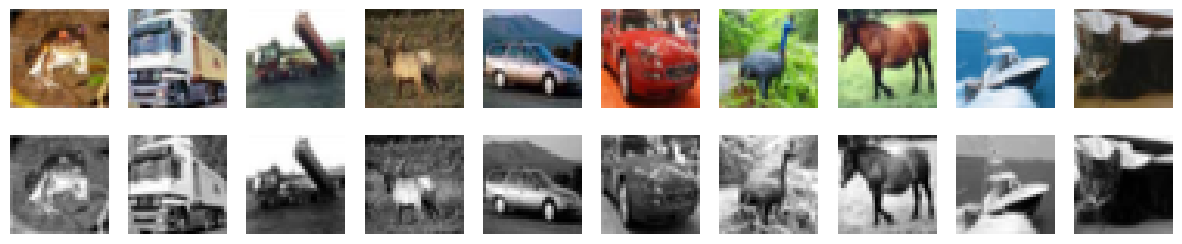

In [ ]:
%matplotlib inline

num_images = 10

plt.figure(figsize=(15, 3))
for i in range(num_images):
    # RGB image
    plt.subplot(2, num_images, i + 1)
    plt.imshow(X_train_pixel[i])
    plt.axis('off')

    # grayscale image
    plt.subplot(2, num_images, i + num_images + 1)
    plt.imshow(X_training_gray[i], cmap='gray')
    plt.axis('off')

print("RGB along with corresponding grayscaled image\n")
plt.show()


## Feature Extraction (HoGs)

In [ ]:
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

def extract_hog_features(image):
    # Compute HoG features
    hog_features, hog_image = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                                   cells_per_block=cells_per_block, visualize=True)

    # Rescale histogram for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_features, hog_image_rescaled

In [ ]:
X_train_HoG = []
X_train_HoG_rescaled = []
y_training = np.array(y_train_pixel)

for image in X_training_gray:
    hog_features, hog_image = extract_hog_features(image)
    X_train_HoG.append(hog_features)
    X_train_HoG_rescaled.append(hog_image)

X_training = np.array(X_train_HoG)
X_test_HoG = []
X_test_HoG_rescaled = []
y_testing = np.array(y_test_pixel)

for image in X_testing_gray:
    hog_features, hog_image = extract_hog_features(image)
    X_test_HoG.append(hog_features)
    X_test_HoG_rescaled.append(hog_image)
X_testing = np.array(X_test_HoG)

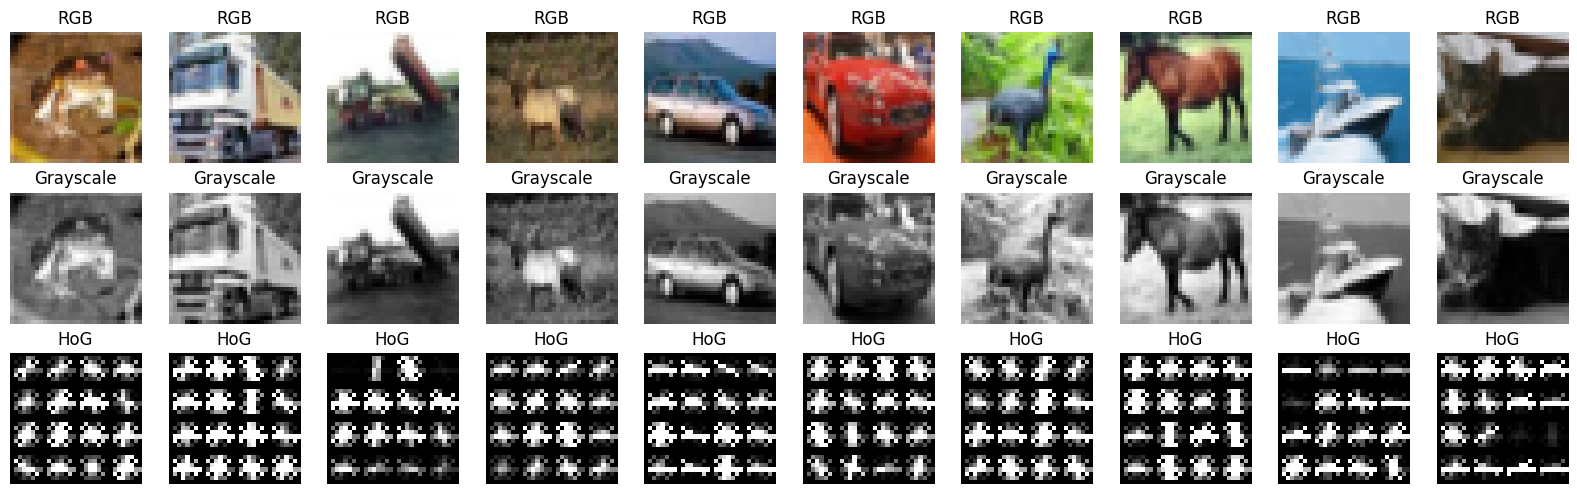

In [ ]:
num_images = 10

plt.figure(figsize=(16, 5))  # Adjust the figure size to accommodate three images per row

for i in range(num_images):
    # RGB image
    plt.subplot(3, num_images, i + 1)
    plt.imshow(X_train_pixel[i])
    plt.title('RGB')
    plt.axis('off')

    # Grayscale image
    plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(X_training_gray[i], cmap='gray')
    plt.title('Grayscale')
    plt.axis('off')

    # HoG visualization
    plt.subplot(3, num_images, i + 1 + 2 * num_images)
    # Assuming X_train_HoG_rescaled contains the rescaled HoG images
    plt.imshow(X_train_HoG_rescaled[i], cmap='gray')
    plt.title('HoG')
    plt.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

## Data Stats

In [ ]:
print( 'X_training shape is {}'.format( X_training.shape) )
print( 'y_training shape is {}'.format( y_training.shape ) )
print( 'X_testing shape is {}'.format( X_testing.shape ) )
print( 'y_testing shape is {}'.format( y_testing.shape ) )

print(X_training)

X_training shape is (50000, 324)
y_training shape is (50000,)
X_testing shape is (10000, 324)
y_testing shape is (10000,)
[[0.26200304 0.20879863 0.2795132  ... 0.22894489 0.08164992 0.15328564]
 [0.17995953 0.15364503 0.17875993 ... 0.12143184 0.16824314 0.02555212]
 [0.00191879 0.         0.00542716 ... 0.01769091 0.07009795 0.03556985]
 ...
 [0.0173854  0.         0.         ... 0.27713998 0.273384   0.13405551]
 [0.01812293 0.         0.00301526 ... 0.07400382 0.19532103 0.16541868]
 [0.12624571 0.13646805 0.07715622 ... 0.06129709 0.20657436 0.01912136]]


In [ ]:
print( 'Overview of Training Data (Features)')
pd.DataFrame( X_training ).describe()

Overview of Training Data (Features)


,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.137601,0.082897,0.090118,0.102097,0.171012,0.089900,0.072338,0.067848,0.077589,0.149983,...,0.097615,0.137268,0.085924,0.094136,0.116418,0.186274,0.094934,0.077149,0.074033,0.079453
std,0.095472,0.082497,0.084742,0.087668,0.101492,0.084565,0.076714,0.075014,0.085352,0.098381,...,0.092334,0.090723,0.080054,0.082016,0.090754,0.098338,0.082151,0.076954,0.076180,0.082591
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050749,0.014953,0.020542,0.028851,0.082237,0.020243,0.011889,0.008619,0.007922,0.060562,...,0.019398,0.059121,0.021773,0.028385,0.042047,0.103639,0.028978,0.018068,0.014950,0.013872
50%,0.124834,0.057155,0.064265,0.079492,0.171004,0.065074,0.046007,0.041164,0.046652,0.145254,...,0.069572,0.122129,0.061525,0.070361,0.094241,0.191000,0.072809,0.051962,0.048510,0.051005
75%,0.226851,0.126563,0.136626,0.156967,0.254369,0.137034,0.108178,0.101114,0.119561,0.240287,...,0.153765,0.215830,0.127786,0.139650,0.176147,0.263477,0.140446,0.111715,0.108195,0.119398
max,0.628524,0.512540,0.552542,0.525049,0.682448,0.499473,0.528356,0.547740,0.493267,0.579524,...,0.545577,0.635999,0.491866,0.471242,0.527723,0.707107,0.488977,0.527286,0.468730,0.534006


In [ ]:
import pandas as pd
print( 'Overview of Training Data (Target)')
pd.DataFrame( y_training ).describe()

Overview of Training Data (Target)


,0
count,50000.00000
mean,4.50000
std,2.87231
min,0.00000
25%,2.00000
50%,4.50000
75%,7.00000
max,9.00000


## SVM classifier (Just to test) (Not the from-scratch implementation)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import numpy as np


svm_classifier = SVC()
svm_classifier.fit(X_training, y_training)

y_pred = svm_classifier.predict(X_testing)

accuracy = accuracy_score(y_testing, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6164


## Eigenfaces (PCA) using sklearn (just so that other classifiers can be trained) ...

## {Will implement this from scratch in meanwhile}


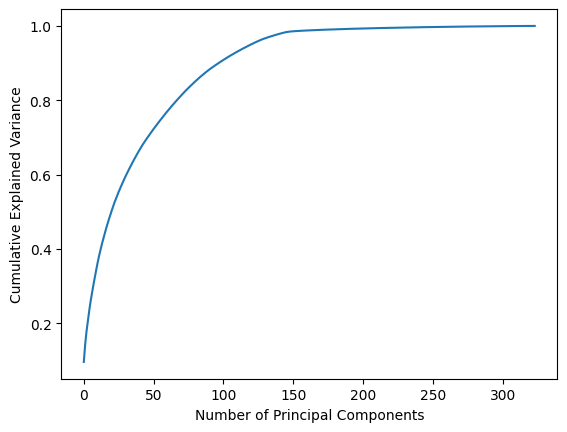

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a StandardScaler
scaler = StandardScaler()

# Fit on the training set and transform both the training and testing sets
X_train_scaled = scaler.fit_transform(X_training)
X_test_scaled = scaler.transform(X_testing)

# Create a PCA object
pca = PCA()

# Fit the PCA on the scaled training data
pca.fit(X_train_scaled)

# Plot the cumulative sum of the explained variance ratio
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
X_training[0].shape

(324,)

In [ ]:
# Choose the number of components
n_components = 130

# Apply PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Get the shape of the images
h, w = 324, 1

# Reshape the principal components to have the same shape as the original images
eigenfaces = pca.components_.reshape((n_components, h, w))

In [ ]:
# Create an SVM classifier
svm = SVC(kernel='rbf', class_weight='balanced')

# Train the classifier on the PCA-transformed training data
svm.fit(X_train_pca, y_training)

SVC(class_weight='balanced')

In [ ]:
from sklearn.metrics import classification_report
# Make predictions on the PCA-transformed test data
test_preds = svm.predict(X_test_pca)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_testing, test_preds)
print("Score:\n", classification_report(y_testing, test_preds))

Score:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68      1000
           1       0.74      0.75      0.75      1000
           2       0.54      0.47      0.50      1000
           3       0.46      0.41      0.43      1000
           4       0.52      0.60      0.56      1000
           5       0.51      0.52      0.51      1000
           6       0.66      0.70      0.68      1000
           7       0.69      0.64      0.66      1000
           8       0.69      0.67      0.68      1000
           9       0.73      0.72      0.72      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000

